In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
os.chdir("/cluster/work/schneider/rethink/jose/xaibench_tf")


In [2]:
from xaibench.utils import DATA_PATH

In [3]:
import numpy as np

pairs = glob(os.path.join(DATA_PATH, "validation_sets", "*", "pairs.csv"))
psizes = np.array([len(pd.read_csv(p)) for p in pairs])


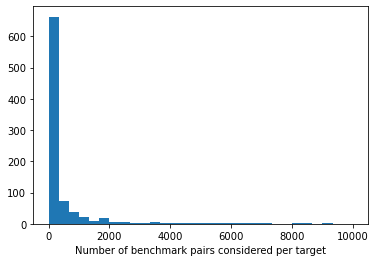

In [4]:
plt.hist(psizes, bins=30, range=[0, 10000])
plt.xlabel("Number of benchmark pairs considered per target")
plt.show()

In [5]:
from tqdm import tqdm
tsizes = []
exists_idx = []

for idx, pair in enumerate(tqdm(pairs)):
    t_path = os.path.join(os.path.dirname(pair), "training.csv")
    if os.path.exists(t_path):
        train_df = pd.read_csv(t_path)
        tsizes.append(len(train_df))
        exists_idx.append(idx)

tsizes = np.array(tsizes)

100%|██████████| 897/897 [00:29<00:00, 30.12it/s]


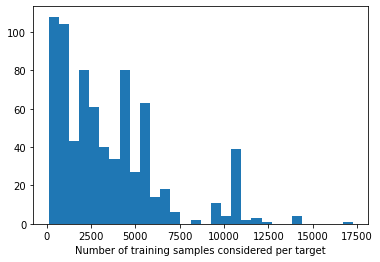

In [6]:
plt.hist(tsizes, bins=30)
plt.xlabel("Number of training samples considered per target")
plt.show()

In [7]:
psizes_ = psizes[exists_idx]

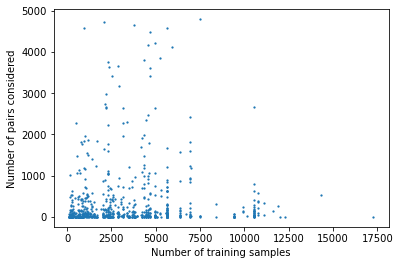

In [10]:
plt.scatter(tsizes[psizes_ < 5000], psizes_[psizes_ < 5000], s=1.5)
plt.xlabel("Number of training samples")
plt.ylabel("Number of pairs considered")
plt.show()

In [9]:
np.corrcoef(tsizes, psizes_)

array([[1.        , 0.14049988],
       [0.14049988, 1.        ]])

In [11]:
len(exists_idx)

745